<a href="https://colab.research.google.com/github/FlakkydDon/Data-Science--Python-Walkthroughs/blob/main/TechHub_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np

In [120]:
df_sales = pd.read_csv('/content/sample_data/TechHub_Sales_Data.csv')
df_sales.head()

,order_date,customer_id,product_id,product_category,revenue,quantity,region,customer_acquisition_channel
0,2023-12-05,C0291,P0084,Monitors,3086.76,2,West Midlands,Referral
1,2023-08-08,C2209,P0080,Tablets,1033.86,2,South West,Organic
2,2024-04-29,C1668,P0049,Tablets,644.56,2,South East,Organic
3,2024-03-17,C1452,P0099,Networking,659.20,4,North East,Paid
4,2023-02-25,C2759,P0095,Smartphones,174.85,1,London,Paid


In [121]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   order_date                    12000 non-null  object 
 1   customer_id                   12000 non-null  object 
 2   product_id                    12000 non-null  object 
 3   product_category              12000 non-null  object 
 4   revenue                       12000 non-null  float64
 5   quantity                      12000 non-null  int64  
 6   region                        12000 non-null  object 
 7   customer_acquisition_channel  12000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 750.1+ KB


In [122]:
df_sales.isnull().sum()

,0
order_date,0
customer_id,0
product_id,0
product_category,0
revenue,0
quantity,0
region,0
customer_acquisition_channel,0


Clean the date column


In [123]:
# Clean the order date column
string_in_date = ['[', ',', '.', '/', ']', ' ']

# identify unwanted strings asa may be present in the date

def clean_date(date):
  if type(date.loc['order_date']) == str:
    return date.loc['order_date']
  else:
    sud = date.loc['order_date']
    sud = str(sud)
    for i in string_in_date:
      if i in sud:
        i_index = sud.find(i)
        sud = sud[:i_index]
        return sud

df_sales['order_date'] = df_sales.apply(clean_date, axis = 1)
df_sales['order_date'] = pd.to_datetime(df_sales['order_date'])

In [124]:
df_sales.head()

,order_date,customer_id,product_id,product_category,revenue,quantity,region,customer_acquisition_channel
0,2023-12-05,C0291,P0084,Monitors,3086.76,2,West Midlands,Referral
1,2023-08-08,C2209,P0080,Tablets,1033.86,2,South West,Organic
2,2024-04-29,C1668,P0049,Tablets,644.56,2,South East,Organic
3,2024-03-17,C1452,P0099,Networking,659.20,4,North East,Paid
4,2023-02-25,C2759,P0095,Smartphones,174.85,1,London,Paid


In [125]:
df_sales.region.unique()

array(['West Midlands', 'South West', 'South East', 'North East',
       'London', 'Scotland', 'North West', 'Wales'], dtype=object)

In [126]:
df_customer = pd.read_csv('/content/sample_data/TechHub_Customers.csv')
df_customer.head()

,customer_id,signup_date,age_group,gender,city,customer_type,loyalty_tier
0,C0001,2020-06-11,18-25,Male,Liverpool,New,Silver
1,C0002,2022-04-11,56-65,Male,Newcastle,New,Gold
2,C0003,2020-09-27,26-35,Male,Cardiff,Returning,Bronze
3,C0004,2023-06-19,56-65,Female,Leicester,New,Bronze
4,C0005,2022-04-08,26-35,Male,Leicester,New,Silver


In [165]:
# Clean the order date column
string_in_date = ['[', ',', '.', '/', ']', ' ']

# identify unwanted strings asa may be present in the date

def clean_date(date):
  if type(date.loc['signup_date']) == str:
    return date.loc['signup_date']
  else:
    sud = date.loc['signup_date']
    sud = str(sud)
    for i in string_in_date:
      if i in sud:
        i_index = sud.find(i)
        sud = sud[:i_index]
        return sud

df_customer['signup_date'] = df_customer.apply(clean_date, axis = 1)
df_customer['signup_date'] = pd.to_datetime(df_customer['signup_date'])

# Calculate 'subscription_tenure'
from datetime import datetime
df_customer['subscription_tenure'] = (datetime.now() - df_customer['signup_date']).dt.days

display(df_customer.head())

,customer_id,signup_date,age_group,gender,city,customer_type,loyalty_tier,account_status,subscription_tenure
0,C0001,2020-06-11,18-25,Male,Liverpool,New,Silver,Active,1962
1,C0002,2022-04-11,56-65,Male,Newcastle,New,Gold,Active,1293
2,C0003,2020-09-27,26-35,Male,Cardiff,Returning,Bronze,Active,1854
3,C0004,2023-06-19,56-65,Female,Leicester,New,Bronze,Active,859
4,C0005,2022-04-08,26-35,Male,Leicester,New,Silver,Active,1296


In [128]:
# Save df_sales to a CSV file
df_sales.to_csv('updated_sales_data.csv', index=False)

In [129]:
# Save df_customer to a CSV file
df_customer.to_csv('updated_customer_data.csv', index=False)

In [130]:
# Merge df_sales with df_customer on customer_id
df_merged = pd.merge(df_sales, df_customer[['customer_id', 'customer_type']], on='customer_id', how='left')

# Create the 'customer_status' column based on the conditions
def categorize_customer(row):
    if pd.isna(row['customer_type']):
        return 'dormant customer'
    elif row['customer_type'] == 'Returning':
        return 'existing'
    else:
        return 'needs_update'

df_sales['customer_status'] = df_merged.apply(categorize_customer, axis=1)

display(df_sales.head())

,order_date,customer_id,product_id,product_category,revenue,quantity,region,customer_acquisition_channel,customer_status
0,2023-12-05,C0291,P0084,Monitors,3086.76,2,West Midlands,Referral,needs_update
1,2023-08-08,C2209,P0080,Tablets,1033.86,2,South West,Organic,existing
2,2024-04-29,C1668,P0049,Tablets,644.56,2,South East,Organic,needs_update
3,2024-03-17,C1452,P0099,Networking,659.20,4,North East,Paid,needs_update
4,2023-02-25,C2759,P0095,Smartphones,174.85,1,London,Paid,existing


In [131]:
display(df_sales['customer_status'].value_counts())

,count
customer_status,
needs_update,7139
existing,4861


In [132]:
display(df_sales.groupby('customer_status')[['revenue', 'quantity']].mean())

,revenue,quantity
customer_status,,
existing,2668.762506,2.510183
needs_update,2621.759746,2.529066


In [133]:
df_customer['account_status'] = df_customer['customer_id'].isin(df_sales['customer_id']).map({True: 'Active', False: 'Dormant'})
display(df_customer.head())

,customer_id,signup_date,age_group,gender,city,customer_type,loyalty_tier,account_status
0,C0001,2020-06-11,18-25,Male,Liverpool,New,Silver,Active
1,C0002,2022-04-11,56-65,Male,Newcastle,New,Gold,Active
2,C0003,2020-09-27,26-35,Male,Cardiff,Returning,Bronze,Active
3,C0004,2023-06-19,56-65,Female,Leicester,New,Bronze,Active
4,C0005,2022-04-08,26-35,Male,Leicester,New,Silver,Active


In [134]:
df_customer

,customer_id,signup_date,age_group,gender,city,customer_type,loyalty_tier,account_status
0,C0001,2020-06-11,18-25,Male,Liverpool,New,Silver,Active
1,C0002,2022-04-11,56-65,Male,Newcastle,New,Gold,Active
2,C0003,2020-09-27,26-35,Male,Cardiff,Returning,Bronze,Active
3,C0004,2023-06-19,56-65,Female,Leicester,New,Bronze,Active
4,C0005,2022-04-08,26-35,Male,Leicester,New,Silver,Active
...,...,...,...,...,...,...,...,...
3495,C3496,2021-12-09,65+,Female,Nottingham,Returning,Silver,Dormant
3496,C3497,2024-03-21,36-45,Female,Edinburgh,Returning,Gold,Dormant
3497,C3498,2024-05-12,56-65,Female,Cardiff,Returning,Silver,Dormant
3498,C3499,2023-12-30,46-55,Male,Belfast,Returning,Silver,Dormant


In [167]:
display(df_customer.describe())
display(df_customer.info())

,signup_date,subscription_tenure
count,3500,3500.000000
mean,2022-03-26 07:18:34.971428608,1308.695429
min,2020-01-01 00:00:00,483.000000
25%,2021-02-07 00:00:00,903.000000
50%,2022-03-25 00:00:00,1310.000000
75%,2023-05-06 00:00:00,1721.000000
max,2024-06-29 00:00:00,2124.000000
std,NaN,473.145139


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          3500 non-null   object        
 1   signup_date          3500 non-null   datetime64[ns]
 2   age_group            3500 non-null   object        
 3   gender               3500 non-null   object        
 4   city                 3500 non-null   object        
 5   customer_type        3500 non-null   object        
 6   loyalty_tier         3500 non-null   object        
 7   account_status       3500 non-null   object        
 8   subscription_tenure  3500 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 246.2+ KB


None

# Clean date in product data

In [135]:
df_product = pd.read_csv('/content/sample_data/TechHub_Products.csv')
df_product.head()

,product_id,product_name,product_category,cost_price,list_price,supplier,launch_date
0,P0001,Purpose Networkin,Networking,73.76,89.25,TechCorp,2019-12-12
1,P0002,Ago Smartphone,Smartphones,749.65,1027.53,Nova Electronics,2021-05-04
2,P0003,Election Monitor,Monitors,610.97,679.83,TechCorp,2020-11-24
3,P0004,Chair Laptop,Laptops,271.03,363.40,Nova Electronics,2019-11-15
4,P0005,Require Monitor,Monitors,730.22,1008.09,Nova Electronics,2023-08-22


In [137]:
# Merge df_sales with df_product to get the cost_price
df_merged_profit = pd.merge(df_sales, df_product[['product_id', 'cost_price']], on='product_id', how='left')

# Calculate the profit
df_sales['profit'] = df_merged_profit['revenue'] - (df_merged_profit['quantity'] * df_merged_profit['cost_price'])

display(df_sales.head())

,order_date,customer_id,product_id,product_category,revenue,quantity,region,customer_acquisition_channel,customer_status,profit
0,2023-12-05,C0291,P0084,Monitors,3086.76,2,West Midlands,Referral,needs_update,2971.90
1,2023-08-08,C2209,P0080,Tablets,1033.86,2,South West,Organic,existing,-87.64
2,2024-04-29,C1668,P0049,Tablets,644.56,2,South East,Organic,needs_update,-800.34
3,2024-03-17,C1452,P0099,Networking,659.20,4,North East,Paid,needs_update,-2388.80
4,2023-02-25,C2759,P0095,Smartphones,174.85,1,London,Paid,existing,-15.84


In [138]:
df_product['product_status'] = df_product['product_id'].isin(df_sales['product_id']).map({True: 'In demand', False: 'Obsolete'})
display(df_product.head())

,product_id,product_name,product_category,cost_price,list_price,supplier,launch_date,product_status
0,P0001,Purpose Networkin,Networking,73.76,89.25,TechCorp,2019-12-12,In demand
1,P0002,Ago Smartphone,Smartphones,749.65,1027.53,Nova Electronics,2021-05-04,In demand
2,P0003,Election Monitor,Monitors,610.97,679.83,TechCorp,2020-11-24,In demand
3,P0004,Chair Laptop,Laptops,271.03,363.40,Nova Electronics,2019-11-15,In demand
4,P0005,Require Monitor,Monitors,730.22,1008.09,Nova Electronics,2023-08-22,In demand


In [139]:
display(df_product['product_status'].value_counts())

,count
product_status,
Obsolete,220
In demand,100


In [159]:
df_merged_performance = pd.merge(df_sales, df_product[['product_id', 'launch_date']], on='product_id', how='left')
df_merged_performance.head()

,order_date,customer_id,product_id,product_category,revenue,quantity,region,customer_acquisition_channel,customer_status,profit,revenue_per_unit,profit_per_unit,launch_date
0,2023-12-05,C0291,P0084,Monitors,3086.76,2,West Midlands,Referral,needs_update,2971.90,1543.38,1485.95,2019-12-13
1,2023-08-08,C2209,P0080,Tablets,1033.86,2,South West,Organic,existing,-87.64,516.93,-43.82,2019-12-22
2,2024-04-29,C1668,P0049,Tablets,644.56,2,South East,Organic,needs_update,-800.34,322.28,-400.17,2021-04-18
3,2024-03-17,C1452,P0099,Networking,659.20,4,North East,Paid,needs_update,-2388.80,164.80,-597.20,2022-02-01
4,2023-02-25,C2759,P0095,Smartphones,174.85,1,London,Paid,existing,-15.84,174.85,-15.84,2023-07-06


Using the product id, quantity and the order date as a unique identifier and the revenue per order, generate the average order volume in a pivot table per product.

In [160]:
# Calculate revenue per unit for each order
df_sales['profit_per_unit'] = df_sales['profit'] / df_sales['quantity']

# Calculate the average revenue per unit per product
average_profit_per_unit_per_product = df_sales.groupby('product_id')['profit_per_unit'].mean().reset_index()

# Create a pivot table for average revenue per unit per product
pivot_table_avg_profit_per_unit = average_profit_per_unit_per_product.pivot_table(index='product_id', values='profit_per_unit', aggfunc='mean')

# Rename the column for clarity
pivot_table_avg_profit_per_unit.rename(columns={'profit_per_unit': 'Average Profit Per Unit'}, inplace=True)

display(pivot_table_avg_profit_per_unit.head())

,Average Profit Per Unit
product_id,
P0001,193.34
P0002,-163.34
P0003,-288.87
P0004,1098.53
P0005,-510.69


/tmp/ipython-input-2245843629.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products_by_avg_profit.index, y='Average Profit Per Unit', data=top_10_products_by_avg_profit, palette='viridis')


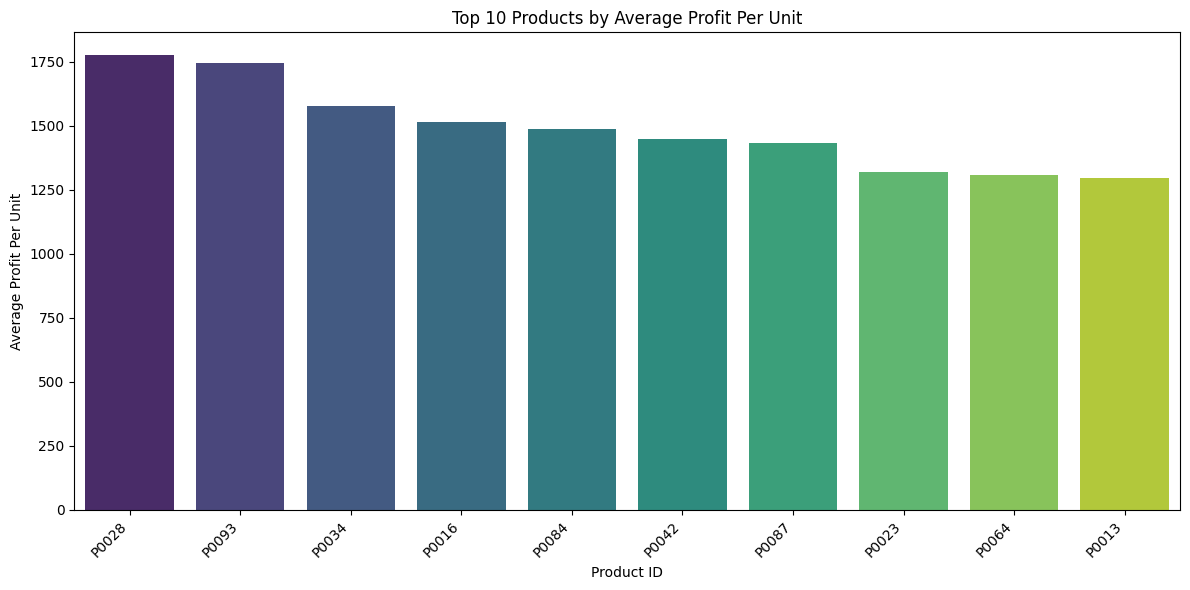

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the pivot table by 'Average Profit Per Unit' in descending order and select the top 10
top_10_products_by_avg_profit = pivot_table_avg_profit_per_unit.sort_values(by='Average Profit Per Unit', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products_by_avg_profit.index, y='Average Profit Per Unit', data=top_10_products_by_avg_profit, palette='viridis')
plt.title('Top 10 Products by Average Profit Per Unit')
plt.xlabel('Product ID')
plt.ylabel('Average Profit Per Unit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [162]:
# Merge df_product with the average revenue per unit data
df_product = pd.merge(df_product, average_profit_per_unit_per_product, on='product_id', how='left')

# Rename the 'revenue_per_unit' column to 'av_product_revenue'
df_product.rename(columns={'profit_per_unit': 'av_product_profit'}, inplace=True)

# Display the updated df_product DataFrame
display(df_product.head())

,product_id,product_name,product_category,cost_price,list_price,supplier,launch_date,product_status,av_product_revenue,av_product_revenue,av_product_profit,av_product_profit
0,P0001,Purpose Networkin,Networking,73.76,89.25,TechCorp,2019-12-12,In demand,267.10,267.10,193.34,193.34
1,P0002,Ago Smartphone,Smartphones,749.65,1027.53,Nova Electronics,2021-05-04,In demand,586.31,586.31,-163.34,-163.34
2,P0003,Election Monitor,Monitors,610.97,679.83,TechCorp,2020-11-24,In demand,322.10,322.10,-288.87,-288.87
3,P0004,Chair Laptop,Laptops,271.03,363.40,Nova Electronics,2019-11-15,In demand,1369.56,1369.56,1098.53,1098.53
4,P0005,Require Monitor,Monitors,730.22,1008.09,Nova Electronics,2023-08-22,In demand,219.53,219.53,-510.69,-510.69


# Creating a Product Performance Table
Create a new data frame named 'Product Performance' using the columns `df_sales['product_id']`, `df_sales['order_date']`, `df_sales['category']`, `df_product['launch_date']`, `df_product['supplier']`, `df_sales['revenue']`, `df_sales['Profit']`, `df_product['product_status']`. In the new data frame, create the following columns: 'Tenure days' = `order_date` - `launch date` (in days), 'MoM' = Month on Month Performance of the product using the revenue as reference point, and 'Profit Margin %' = (`[Profit]` / `[Revenue]`) × 100.

## Merge dataframes

### Subtask:
Merge `df_sales` and `df_product` on `product_id` to combine the necessary columns into a new DataFrame.


In [169]:
import os
print(os.listdir('/content/sample_data'))

['anscombe.json', 'README.md', 'TechHub_Products.csv', 'TechHub_Customers.csv', 'TechHub_Sales_Data.csv', 'mnist_train_small.csv', 'mnist_test.csv', 'california_housing_test.csv', 'california_housing_train.csv']


In [170]:
# Creating a Product Performance Table
df_product['product_status'] = df_product['product_id'].isin(df_sales['product_id']).map({True: 'In demand', False: 'Obsolete'})

df_merged_performance = pd.merge(df_sales[['product_id', 'order_date', 'product_category', 'revenue', 'quantity']], df_product[['product_id', 'launch_date', 'supplier', 'cost_price', 'product_status', 'av_product_profit']], on='product_id', how='left')
df_merged_performance['order_date'] = pd.to_datetime(df_merged_performance['order_date'])
df_merged_performance['launch_date'] = pd.to_datetime(df_merged_performance['launch_date'])
df_merged_performance['Tenure days'] = (df_merged_performance['order_date'] - df_merged_performance['launch_date']).dt.days
df_merged_performance['order_month'] = df_merged_performance['order_date'].dt.to_period('M')

df_product_monthly_revenue = df_merged_performance.groupby(['product_id', 'order_month'])['revenue'].sum().unstack()
df_product_mom = df_product_monthly_revenue.pct_change(axis=1)
df_product_mom_melted = df_product_mom.melt(ignore_index=False, var_name='order_month', value_name='MoM').reset_index()

df_merged_performance = pd.merge(df_merged_performance, df_product_mom_melted, on=['product_id', 'order_month'], how='left')

df_merged_performance['profit'] = df_merged_performance['revenue'] - (df_merged_performance['quantity'] * df_merged_performance['cost_price'])


# Select final columns for Product_performance DataFrame
Product_performance = df_merged_performance[[
    'product_id',
    'order_date',
    'product_category',
    'launch_date',
    'supplier',
    'revenue',
    'profit',
    'product_status',
    'Tenure days',
    'MoM',
    'av_product_profit' # Include av_product_profit
]].copy()

# Rename columns to match the request
Product_performance.rename(columns={
    'product_category': 'category',
    'profit': 'Profit'
}, inplace=True)

# Calculate 'Profit Margin %'
Product_performance['Profit Margin %'] = (Product_performance['Profit'] / Product_performance['revenue']) * 100

# Handle potential infinite values resulting from division by zero revenue or zero tenure days
Product_performance.replace([np.inf, -np.inf], 0, inplace=True)
Product_performance['Tenure days'] = Product_performance['Tenure days'].replace(0, np.nan) # Replace 0 tenure days with NaN to avoid division by zero

# Create 'profit_over_time' column
Product_performance['profit_over_time'] = Product_performance['Profit'] / Product_performance['Tenure days']
Product_performance['profit_over_time'] = Product_performance['profit_over_time'].replace([np.inf, -np.inf], np.nan) # Handle division by zero after calculation


# Round 'MoM' and 'Profit Margin %' to 2 decimal places
Product_performance['MoM'] = Product_performance['MoM'].round(2)
Product_performance['Profit Margin %'] = Product_performance['Profit Margin %'].round(2)
Product_performance['profit_over_time'] = Product_performance['profit_over_time'].round(2)


display(Product_performance.head())

/tmp/ipython-input-1988597631.py:12: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_product_mom = df_product_monthly_revenue.pct_change(axis=1)


,product_id,order_date,category,launch_date,supplier,revenue,Profit,product_status,Tenure days,MoM,av_product_profit,av_product_profit,Profit Margin %,profit_over_time
0,P0084,2023-12-05,Monitors,2019-12-13,ByteWare,3086.76,2971.90,In demand,1453.0,0.65,1485.95,1485.95,96.28,2.05
1,P0080,2023-08-08,Tablets,2019-12-22,TechCorp,1033.86,-87.64,In demand,1325.0,0.14,-43.82,-43.82,-8.48,-0.07
2,P0049,2024-04-29,Tablets,2021-04-18,TechCorp,644.56,-800.34,In demand,1107.0,-0.57,-400.17,-400.17,-124.17,-0.72
3,P0099,2024-03-17,Networking,2022-02-01,ByteWare,659.20,-2388.80,In demand,775.0,-0.19,-597.20,-597.20,-362.38,-3.08
4,P0095,2023-02-25,Smartphones,2023-07-06,ByteWare,174.85,-15.84,In demand,-131.0,0.29,-15.84,-15.84,-9.06,0.12


# Download all new dataframe as .cvs file
Download,  df_sales = df_sales_TechHub, df_product- df_product_ TechHub,
df_customer = df_customer_TechHub, and Product performance = TechHub_Product_Performance

In [166]:
# Save df_sales to a CSV file
df_sales.to_csv('df_sales_TechHub.csv', index=False)

# Save df_customer to a CSV file
df_customer.to_csv('df_customer_TechHub.csv', index=False)

# Save df_product to a CSV file
df_product.to_csv('df_product_TechHub.csv', index=False)

# Save Product_performance to a CSV file
Product_performance.to_csv('TechHub_Product_Performance.csv', index=False)